# Complete Financial Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Fetching file paths
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/200-financial-indicators-of-us-stocks-20142018/2016_Financial_Data.csv
/kaggle/input/200-financial-indicators-of-us-stocks-20142018/2015_Financial_Data.csv
/kaggle/input/200-financial-indicators-of-us-stocks-20142018/2014_Financial_Data.csv
/kaggle/input/200-financial-indicators-of-us-stocks-20142018/2017_Financial_Data.csv
/kaggle/input/200-financial-indicators-of-us-stocks-20142018/2018_Financial_Data.csv


In [2]:
df_2014 = pd.read_csv('/input/200-financial-indicators-of-us-stocks-20142018/2014_Financial_Data.csv')
df_2015 = pd.read_csv('/input/200-financial-indicators-of-us-stocks-20142018/2015_Financial_Data.csv')
df_2016 = pd.read_csv('/input/200-financial-indicators-of-us-stocks-20142018/2016_Financial_Data.csv')
df_2017 = pd.read_csv('/input/200-financial-indicators-of-us-stocks-20142018/2017_Financial_Data.csv')
df_2018 = pd.read_csv('/input/200-financial-indicators-of-us-stocks-20142018/2018_Financial_Data.csv')


In [3]:
# Let's Check Shape of Each data set
print("Shape of data for Year 2014 is {}".format(df_2014.shape))
print("Shape of data for Year 2015 is {}".format(df_2015.shape))
print("Shape of data for Year 2016 is {}".format(df_2016.shape))
print("Shape of data for Year 2017 is {}".format(df_2017.shape))
print("Shape of data for Year 2018 is {}".format(df_2018.shape))

Shape of data for Year 2014 is (3808, 225)
Shape of data for Year 2015 is (4120, 225)
Shape of data for Year 2016 is (4797, 225)
Shape of data for Year 2017 is (4960, 225)
Shape of data for Year 2018 is (4392, 225)


In [4]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


In [5]:
# Data missing information for 2014 year
data_info=pd.DataFrame(df_2014.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_2014.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2014.isnull().sum()/df_2014.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
null values (nb),0,44,236,74,52,136,59,63,55,63,...,290,290,290,369,302,247,243,0,0,0
null values (%),0,1.15546,6.19748,1.94328,1.36555,3.57143,1.54937,1.65441,1.44433,1.65441,...,7.61555,7.61555,7.61555,9.69013,7.93067,6.48634,6.3813,0,0,0


In [6]:
# Data missing information for 2015 year
data_info=pd.DataFrame(df_2015.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df_2015.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df_2015.isnull().sum()/df_2015.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2016 PRICE VAR [%],Class
column type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
null values (nb),0,67,340,193,65,265,170,174,42,175,...,368,369,369,458,399,351,347,0,0,0
null values (%),0,1.62621,8.25243,4.68447,1.57767,6.43204,4.12621,4.2233,1.01942,4.24757,...,8.93204,8.95631,8.95631,11.1165,9.68447,8.51942,8.42233,0,0,0


### Imputation

We have chosen to impute missing values with zero. This decision is based on the understanding that these missing values correspond to companies that do not have reported data for that specific year.

In [2]:
df_2014.fillna(0,inplace=True)
df_2015.fillna(0,inplace=True)
df_2016.fillna(0,inplace=True)
df_2017.fillna(0,inplace=True)
df_2018.fillna(0,inplace=True)

NameError: name 'df_2014' is not defined

## Ratio Analysis

Note : I am performing all analysis on one organization (Procter & Gamble). We can all analysis in similar manner

Organization can be identify by ticker sysmbol given in column 'Unnamed: 0'

*** Financial Ratio is quick way to understand any company position. There are around more than 59 Financial ratios

Quick Ratio : current assest - Inventory /current liabilities ( This is best way to understand liquidity of organization, how quick organization is able to pay all liabilities)

### Ratio Analysis for Procter & Gamble (Ticker Symbol: PG)

When evaluating a company’s financial health, ratio analysis provides valuable insights. Procter & Gamble (PG) serves as our focal organization for this analysis. By examining various financial ratios, we gain a comprehensive understanding of PG’s position.

One crucial ratio is the **Quick Ratio**, which measures liquidity. It is calculated as follows:

Quick Ratio = Current Assets - Inventory /Current Liabilities

The ***Quick Ratio assesses how efficiently an organization can cover its short-term obligations.*** Specifically, it evaluates PG’s ability to promptly settle liabilities without relying on inventory sales. Higher Quick Ratios indicate better liquidity and a stronger ability to meet financial commitments.

In [8]:
# Considering Procter & Gamble company only 
df_2014 = df_2014[df_2014['Unnamed: 0'] =='PG' ]
df_2015 = df_2015[df_2015['Unnamed: 0'] =='PG' ]
df_2016 = df_2016[df_2016['Unnamed: 0'] =='PG' ]
df_2017 = df_2017[df_2017['Unnamed: 0'] =='PG' ]
df_2018 = df_2018[df_2018['Unnamed: 0'] =='PG' ]

In [9]:
df = df_2014.append([df_2015,df_2016,df_2017,df_2018])
df.fillna(0,inplace=True)
df.index = [2014,2015,2016,2017,2018]

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Mean of Quick Ratio for P&G last 5 year is 0.57 


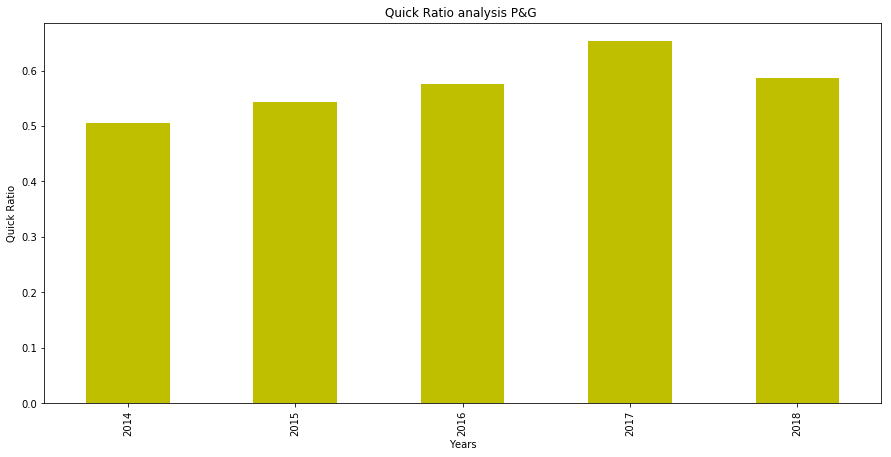

In [10]:
print("Mean of Quick Ratio for P&G last 5 year is {:.2f} ".format(df['quickRatio'].mean()))
plt.figure(figsize=(15, 7))
df['quickRatio'].plot.bar(color='y')
plt.xlabel('Years')
plt.ylabel('Quick Ratio')
plt.title('Quick Ratio analysis P&G ')
plt.grid(False)
plt.show()

### Analysis of Procter & Gamble’s Quick Ratio

Procter & Gamble (PG) currently exhibits a Quick Ratio of **0.57**. This ratio signifies that the company’s liabilities exceed its current assets by more than twofold. In practical terms, this implies that PG may face challenges in meeting its short-term obligations.

However, before drawing any definitive conclusions regarding short-term obligations, it is essential to analyze the **Current Ratio** as well. The ***Current Ratio provides a broader perspective on PG’s ability to manage its financial commitments.***

**Current Ratio: Current Assest+Inventory / Current Liabilities**

**Good Current ratio in between 1 and 2, if the current ratio is more than 2 it means the company is unable to make use of inventory**

Mean of Quick Ratio for P&G last 5 year is 0.95 


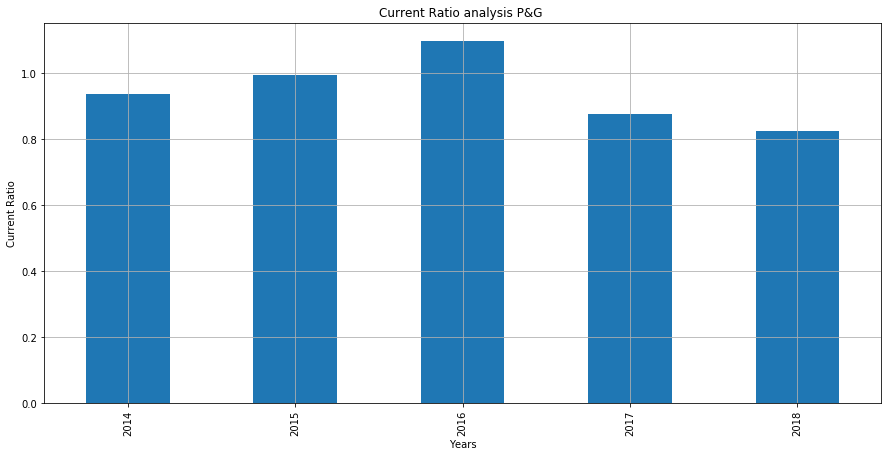

In [11]:
# Current ratio
print("Mean of Quick Ratio for P&G last 5 year is {:.2f} ".format(df['currentRatio'].mean()))
plt.figure(figsize=(15, 7))
df['currentRatio'].plot.bar()
plt.xlabel('Years')
plt.ylabel('Current Ratio')
plt.title('Current Ratio analysis P&G ')
plt.grid(True)
plt.show()

1. **P&G has good Current ratio (0.95) but still company has more current liabilites compare to current assests**
2. **Let's Analyze debt to equity Ratio : The debt-to-equity (D/E) ratio is calculated by dividing a company’s total liabilities by its shareholder equity**
    **it reflects the ability of shareholder equity to cover all outstanding debts in the event of a business downturn.**
3. **​	  Debt/Equity= Total Liabilities/Shareholder Equity**
4. **Total Asset = Liabilities + Shareholder equity**

Mean of Debt to Equity  Ratio for P&G last 5 year is 0.53 


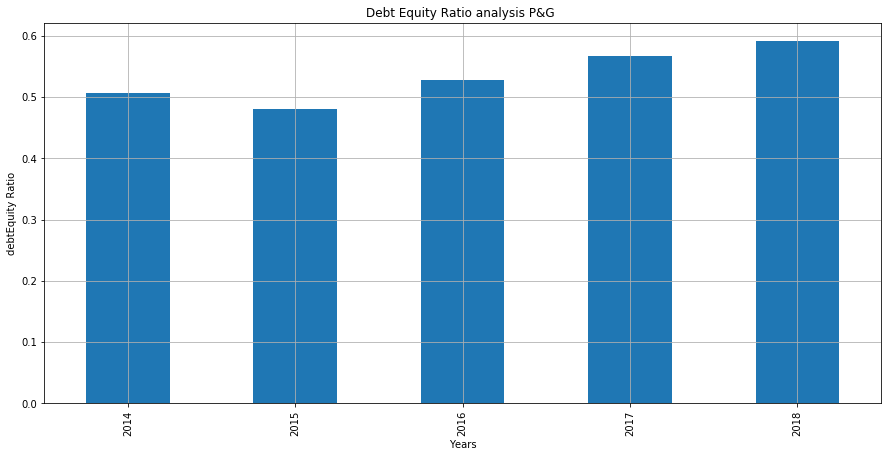

In [12]:
# Debt to Equity ratio
print("Mean of Debt to Equity  Ratio for P&G last 5 year is {:.2f} ".format(df['debtEquityRatio'].mean()))
plt.figure(figsize=(15, 7))
df['debtEquityRatio'].plot.bar()
plt.xlabel('Years')
plt.ylabel('debtEquity Ratio')
plt.title('Debt Equity Ratio analysis P&G ')
plt.grid(True)
plt.show()

### Debt Ratio Considerations for Investors:

Investors often seek companies with a debt ratio falling within the range of **0.3 to 0.6**. This range indicates a balanced level of debt relative to equity, which is generally considered favourable.

Now, let’s delve into the analysis of **Inventory Turnover**. This metric gauges ***how efficiently a company utilizes its inventory over a specific time frame, typically a year. Specifically, it assesses whether a business maintains an appropriate inventory level relative to its sales volume.***

The formula for Inventory Turnover is as follows:

Inventory Turnover = Sales/Average Inventory

To calculate the **Average Inventory**, we use the following formula:
Average Inventory = (Start Inventory - ending Inventory)/2

By examining Inventory Turnover, investors gain insights into ***how effectively a company manages its inventory in relation to its overall sales performance.***

Mean of Inventory Turnover for P&G last 5 year is 12.92 


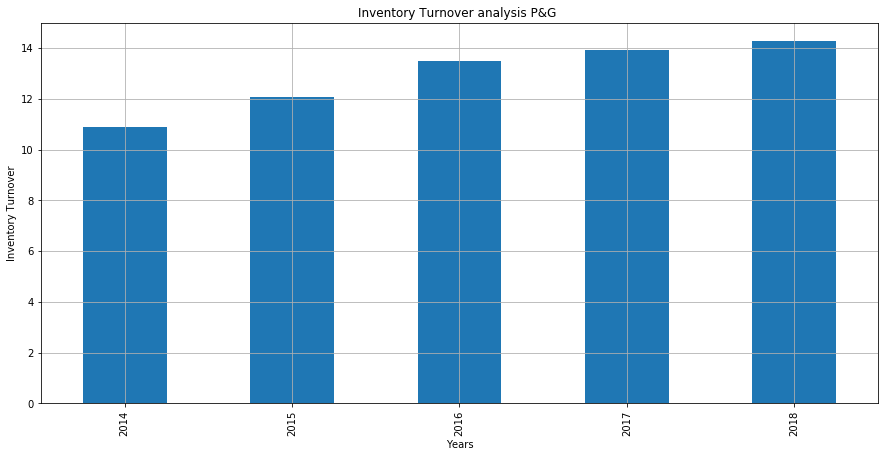

In [13]:
# Return on equity
print("Mean of Inventory Turnover for P&G last 5 year is {:.2f} ".format(df['inventoryTurnover'].mean()))
plt.figure(figsize=(15, 7))
df['inventoryTurnover'].plot.bar()
plt.xlabel('Years')
plt.ylabel('Inventory Turnover')
plt.title('Inventory Turnover analysis P&G ')
plt.grid(True)
plt.show()

### Balance Sheet Analysis

1. **Asset Section:**
   - **Short-Term Assets**: These are assets that are expected to be converted into cash or used up within a year. They include:
     - **Cash and Cash Reserves**: Liquid funds readily available for day-to-day operations.
     - **Cash Equivalents**: Highly liquid investments with minimal risk.
     - **Inventories**: Goods held for sale or production.
     - **Accounts Receivable**: Amounts owed by customers for goods or services.
     - **Securities**: Marketable investments.
   - **Long-Term Assets**: These are assets with a longer useful life. They include:
     - **Property, Plant, and Equipment**: Tangible assets like land, buildings, machinery, and vehicles.
     - **Long-Term Investments**: Holdings in other companies or securities.
     - **Intangible Assets**: Non-physical assets such as patents, trademarks, and goodwill.

2. **Liabilities Section:**
   - **Short-Term Liabilities**: Obligations due within a year. They encompass:
     - **Short-Term Debts**: Loans or payables due soon.
     - **Dividends Payable**: Amounts owed to shareholders.
     - **Trade Account Payable**: Outstanding bills to suppliers.
     - **Customer Deposits**: Prepayments from customers.
     - **Current Portion of Long-Term Debts**: The portion of long-term debt due within a year.
   - **Long-Term Liabilities**: Obligations extending beyond one year. These include:
     - **Long-Term Loans**: Borrowings with extended repayment periods.
     - **Deferred Revenues**: Income received in advance (e.g., subscriptions).
     - **Deferred Compensation**: Employee benefits accrued over time.

Analyzing each of these components provides valuable insights into a company’s financial health and its ability to meet short-term and long-term obligations.

### Short-Term Analysis of Assets of P&G

**Cash and Cash Equivalents:** These are highly liquid funds that P&G holds. They include actual cash on hand and short-term investments that can be quickly converted to cash if needed. 

**Inventories:** P&G’s inventories consist of goods held for sale or production. This includes raw materials, work-in-progress, and finished goods. 

**Average Receivables:** This represents the average amount of money owed to P&G by its customers. It includes accounts receivable and reflects the company’s credit sales. 

**Investments:** P&G may also hold short-term investments in securities or other financial instruments. These investments are typically low-risk and easily convertible to cash. Analyzing these short-term assets provides insights into P&G’s liquidity, operational efficiency, and financial stability.

In [14]:
df['ShortTermAssest'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']+df['Inventories']+df['Average Receivables']\
                        + df['Investments']+df['Investment purchases and sales']+df['Short-term investments']

df['liquidcash'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']

Mean of short Term assest for P&G last 5 year is 40091400000.00 


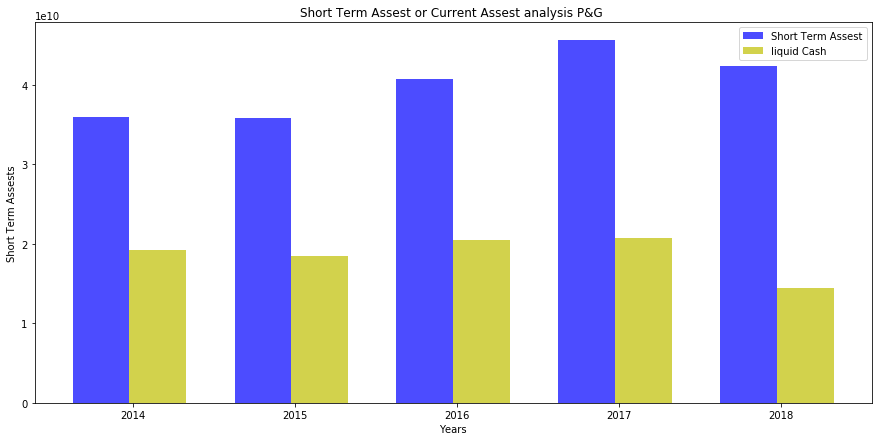

In [15]:
# Short Term Assets
n_year = 5
index = np.arange(n_year)
bar_width = 0.35
opacity = 0.7

print("Mean of short Term assest for P&G last 5 year is {:.2f} ".format(df['ShortTermAssest'].mean()))

plt.figure(figsize=(15, 7))
plt.bar(index,df['ShortTermAssest'],bar_width,alpha=opacity,color='b',label='Short Term Assest')
plt.bar(index+bar_width,df['liquidcash'],bar_width,alpha=opacity,color='y',label='liquid Cash')
plt.xlabel('Years')
plt.ylabel('Short Term Assests')
plt.title('Short Term Assest or Current Assest analysis P&G ')
plt.xticks(index+0.20, df.index)
plt.grid(False)
plt.legend()
plt.show()

### Long-Term Analysis of Assets of P&G

1. **Property, Plant, and Equipment (PP&E)**: These tangible assets encompass land, buildings, machinery, vehicles, and other physical infrastructure owned by P&G. PP&E plays a critical role in the company's operations and production processes.

2. **Goodwill and Intangible Assets**: Goodwill represents the premium paid by P&G when acquiring other companies. It reflects the value of brand reputation, customer relationships, and other non-physical assets. Intangible assets include patents, trademarks, copyrights, and software licenses.

3. **Long-Term Investments**: P&G may hold investments in other companies, joint ventures, or securities with extended maturity periods. These investments contribute to the company's long-term growth and diversification strategy.

Analyzing these long-term assets provides insights into P&G's strategic positioning, competitive advantages, and future prospects.

Mean of Long Term assest for P&G last 5 year is 92571200000.00 
Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is 72.37% 


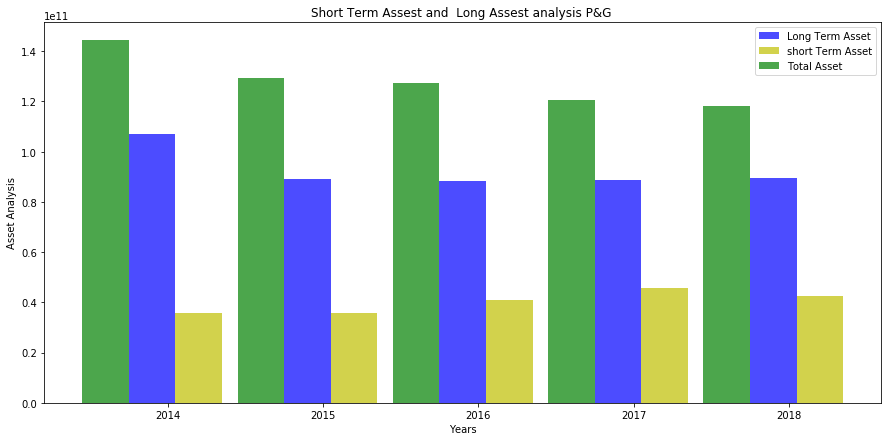

In [16]:
# Long Term Asset and Short-Term Asset
df['LongTermAsset'] = df['Property, Plant & Equipment Net'] +df['Goodwill and Intangible Assets']+df['Long-term investments']
# Long term Asset
n_year = 5
index = np.arange(n_year)
bar_width = 0.3
opacity = 0.7

print("Mean of Long Term assest for P&G last 5 year is {:.2f} ".format(df['LongTermAsset'].mean()))

print("Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is {:.2f}% ".format((df['LongTermAsset'].mean()/df['Total assets'].mean())*100))


plt.figure(figsize=(15, 7))
plt.bar(index,df['LongTermAsset'],bar_width,alpha=opacity,color='b',label='Long Term Asset')
plt.bar(index+bar_width,df['ShortTermAssest'],bar_width,alpha=opacity,color='y',label='short Term Asset')
plt.bar(index-bar_width,df['Total assets'],bar_width,alpha=opacity,color='g',label='Total Asset')
plt.xlabel('Years')
plt.ylabel('Asset Analysis')
plt.title('Short Term Assest and  Long Assest analysis P&G ')
plt.xticks(index+0.10, df.index)
plt.grid(False)
plt.legend()
plt.show();